## Online Shoppers Purchasing Intention Dataset ile Lojistik Regresyon Sınıflandırması

Veri seti link: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

In [24]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
# Veri setini yükleme
df = pd.read_csv('online_shoppers_intention.csv')
# veri setinin ilk beş satırı
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# Veri setinin bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# satır ve sütun sayısını görüntüleme
df.shape

(12330, 18)

In [26]:
# tanımlayıcı istatistikler
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
# Eksik değerleri kontrol etme
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Veri setindeki tekrarlayan satırları kaldırmalıyız. Çünkü gereksiz veri yükünü azaltmak ve model performansını arttırmak için bu gereklidir. Aynı satırlar, aynı bilgiyi içererir ve modelin performansını artırmaz, aksine aşırı uyum (overfitting) oluşmasına neden olabilir. Bu durumda, model, eğitim verilerinde çok iyi performans gösterirken, test verilerinde veya gerçek hayatta karşılaşacağı verilerde kötü performans gösterir.

In [27]:
# Tekrarlayan satırları kaldırma
df.drop_duplicates(inplace=True)
# tekrar satır ve sütun sayısını kontrol etme
df.shape

(12205, 18)

### Veri Görselleştirme

Görselleştirme, veri setini anlama açısından önemlidir. Bu yüzden bazı özelliklere göre veri setini görselleştirmeliyiz.

weekend ve revenue sütunlarında True ve False değerlerinin kaç kez tekrar ettiğini saydırma:

In [8]:
print(df.Weekend.value_counts())

Weekend
False    9346
True     2859
Name: count, dtype: int64


In [9]:
print(df.Revenue.value_counts())

Revenue
False    10297
True      1908
Name: count, dtype: int64


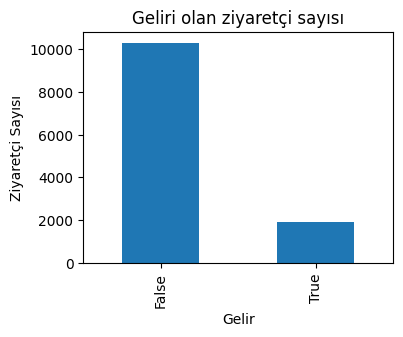

In [28]:
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Geliri olan ziyaretçi sayısını görselleştirme
rcParams['figure.figsize'] = 4, 3
df.Revenue.value_counts().plot(kind='bar')
plt.xlabel('Gelir')
plt.ylabel('Ziyaretçi Sayısı')
plt.title('Geliri olan ziyaretçi sayısı')
plt.show()


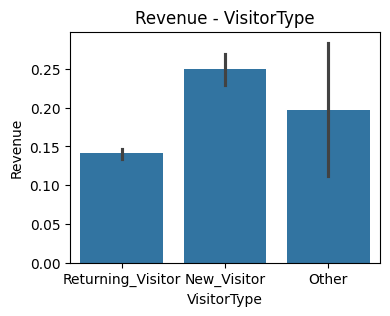

In [11]:
# VisitorType ile Revenue arasındaki ilişkiyi görselleştirme
sns.barplot(x='VisitorType', y='Revenue', data=df)
plt.title('Revenue - VisitorType')
plt.show()

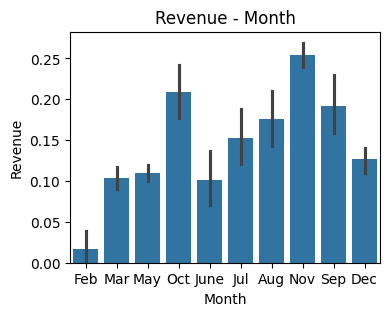

In [29]:
# Month ile Revenue arasındaki ilişkiyi görselleştirme
sns.barplot(x='Month', y='Revenue', data=df)
plt.title('Revenue - Month')
plt.show()

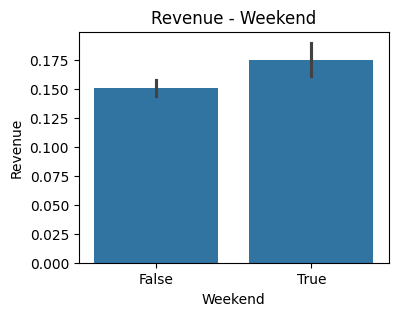

In [30]:
# Weekend ile Revenue arasındaki ilişkiyi görselleştirme
sns.barplot(x='Weekend', y='Revenue', data=df)
plt.title('Revenue - Weekend')
plt.show()

Lojistik regresyon gibi sınıflandırma modelleri için, veri setinin bağımsız değişkenlerini (X) ve hedef değişkenini (y) belirlemek gerekir.

Bu yüzden aşağıdaki kodda veri setindeki hedef değişkeni **Revenue** bağımlı değişken olarak ayırarak bağımsız değişkenleri **(X)** ve hedef değişkeni **(y)** olarak ayarlanmıştır. 

**df.drop('Revenue', axis=1)** ile, df veri setinden 'Revenue' sütununu çıkarır ve kalan sütunları (axis=1) X değişkenine atar. Bu, 'Revenue' sütununun bağımsız değişkenler arasında yer almadığını belirtir.


In [14]:
# Bağımsız ve bağımlı değişkenlerin ayrılması
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [15]:
# İşe yaramayan sütunları kaldırma
X.drop('PageValues', axis=1, inplace=True)

logistik regresyon sınıflandırması yaptığım için weekend veri tipini bool'dan integer'a çevirmem gerekiyor. Bunun için:

In [16]:
# Weekend sütununu integer tipe çevirme
X['Weekend'] = X['Weekend'].astype(int)

Bu kodda, **get_dummies()** fonksiyonunu kullanarak, X veri setinin kategorik değişkenlerini ikili (binary) değişkenlere dönüştürdüm. Bu dönüşüm her kategorik değişkenin her bir benzersiz değeri için bir sütun ekleyerek yapılır ve bu yeni sütunlara ikili değerler atanır (0 veya 1). drop_first=True ise, her kategorik değişken için ilk değeri sütundan kaldırmaktadır.

In [31]:
# Kategorik değişkenleri ikili değişkenlere dönüştürme
X = pd.get_dummies(X, drop_first=True)
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,OperatingSystems,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,-0.460019,0,-0.246257,1,-0.628793,3.969402,3.434394,-0.31024,1,...,True,False,False,False,False,False,False,False,False,True
1,0,-0.460019,0,-0.246257,2,-0.595451,-0.450137,1.268054,-0.31024,2,...,True,False,False,False,False,False,False,False,False,True
2,0,-0.460019,0,-0.246257,1,-0.628793,3.969402,3.434394,-0.31024,4,...,True,False,False,False,False,False,False,False,False,True
3,0,-0.460019,0,-0.246257,2,-0.627404,0.654748,2.134590,-0.31024,3,...,True,False,False,False,False,False,False,False,False,True
4,0,-0.460019,0,-0.246257,10,-0.301889,-0.008183,0.184884,-0.31024,3,...,True,False,False,False,False,False,False,False,False,True


**StandardScaler()** ölçeklendirme yapmak için kullanılır.

**num_cols** listesi, X veri çerçevesindeki sayısal sütunların adlarını içerir.

**scaler.fit_transform()** satırı, StandardScaler sınıfından bir örnek oluşturur ve ardından fit_transform() metodunu kullanarak belirtilen sütunların her birindeki verileri ölçeklendirir. Ölçeklendirilmiş veriler, X DataFrame'indeki ilgili sütunlara yazılır.

Sonuç olarak, **StandardScaler** yaparak kodun daha doğru sonuçlar vermesi ve 
lojistik regresyon modelimin daha iyi çalışmasını sağlamış oluyorum.

In [33]:
# Sayısal sütunların belirlenmesi
num_cols = ['Administrative_Duration','Informational_Duration',
            'ProductRelated_Duration','BounceRates','ExitRates',
            'SpecialDay'
    ]

# StandardScaler ile sayısal sütunların ölçeklendirilmesi
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

Şimdi ise veri setini eğitim ve test seti olarak ikiye ayırmak gereklidir. X, bağımsız değişkenleri içeren bir DataFramedir, y hedef değişkeni içeren bir vektördür. Veri setinin %30 u test verisi olarak ayrılmıştır. random_state=42 ile de veri setinin rastgele bir şekilde bölünmesini sağlar ve sonuçların tekrarlanabilirliğini sağlamaktadır.

In [34]:
# Verilerin eğitim ve test seti olarak ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Hiperparametre ayarlarlaması yapmak modelin performansını arttırır 0.001, 0.01, 0.1, 1. hiperparametre değerleri belirlenmiştir.

lojistik regresyon sınıflandırması yapmak için LogisticRegression fonksiyonu kullanıyoruz. 

class_weight='balanced' parametresi ise veri setindeki sınıflardan daha az örneğe sahip sınıfları da dikkate almak için kullanılmıştır.

GridsearchCV() ile ojistik regresyon modelinin hiperparametrelerini belirlemek için kullanılır. 

**penalty** parametresi, modelin overfitting yapmasını önlemek için kullanılmıştır. L1 regularization, verilerdeki gürültüye karşı daha dayanıklıdır ve nadir sınıfların sınıflandırılmasında daha iyi performans gösterebilirken, L2 regularization ise daha genelleyici sonuçlar verir.

**scoring='accuracy'** parametresi, doğruluk değerlendirmesi içindir.

Daha sonra model eğitim verileri üzerinde eğitilerek, test verileri üzerinde prediction yapılmıştır. log_reg_cv.best_score_ ve log_reg_cv.best_params_ kodları, model için en iyi doğruluk skorunu ve en iyi hiperparametre değerlerini belirler. log_reg_cv.score(X_test, y_test) kodu ise test verileri üzerindeki doğruluk skorunu hesaplar.

In [36]:
# Hiperparametre ayarları
params = {'C': [0.001, 0.01, 0.1, 1.], 'penalty': ['l1', 'l2']
}
 
# Lojistik regresyon modeli
log_reg = LogisticRegression(random_state=42, class_weight='balanced',solver='liblinear'
    )

# GridSearchCV ile modelin hiperparametrelerini belirleme
log_reg_cv = GridSearchCV(
    log_reg, 
    param_grid=params, 
    cv=5,
    scoring='accuracy',
)
# Modelin eğitilmesi
log_reg_cv.fit(X_train, y_train)

# Tahminlerin yapılması
y_pred = log_reg_cv.predict(X_test)
print(f'Prediction: {y_pred[:5]}')

# En iyi skor ve parametrelerin görüntülenmesi
print('Best score: ', log_reg_cv.best_score_)
print('Best params: ', log_reg_cv.best_params_)
print('Score: ', log_reg_cv.score(X_test, y_test))

Prediction: [ True  True False  True  True]
Best score:  0.6338532880753909
Best params:  {'C': 1.0, 'penalty': 'l2'}
Score:  0.6376297105406882


Yukarıdaki sonuçlara göre, doğruluk skoru %63.79 tür. En iyi parametre 1.0 dır.
'penalty': 'l2' olarak belirlenmiştir.

## precision ,recall, f1 score hesaplanması:

Aşağıdaki sonuçlara göre, modelin doğruluğu (accuracy) %64'tür. Precision değeri 0.93 olan "False" sınıfında yüksektir, yani bu sınıfta tahmin edilen pozitif değerlerin çoğu gerçekte pozitif değildir. Bu sonuç, modelin False sınıfını doğru bir şekilde tahmin etme becerisini yüksek olduğunu gösterir. Precision değeri 0.25 olan "True" sınıfında oldukça düşüktür, yani bu sınıfta tahmin edilen pozitif değerlerin yalnızca küçük bir kısmı gerçektende pozitiftir. Recall değeri 0.74 olan "True" sınıfında yüksektir, bu da modelin gerçek pozitif değerleri doğru bir şekilde tahmin etme becerisini gösterir. F1-score, precision ve recall değerlerinin harmonik ortalamasıdır ve bu sonuçlar, modelin performansını daha iyi bir şekilde değerlendirmeye yardımcı olur. Sonuçlar, modelin "True" sınıfında düşük bir performans gösterdiğini, "False" sınıfında yüksek bir performans sergilediğini göstermektedir.

In [21]:
from sklearn.metrics import classification_report
 
y_pred = log_reg_cv.predict(X_test)
# Precision, Recall, F1-score hesaplanması
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.62      0.74      3116
        True       0.25      0.74      0.38       546

    accuracy                           0.64      3662
   macro avg       0.59      0.68      0.56      3662
weighted avg       0.83      0.64      0.69      3662



## ROC Curve

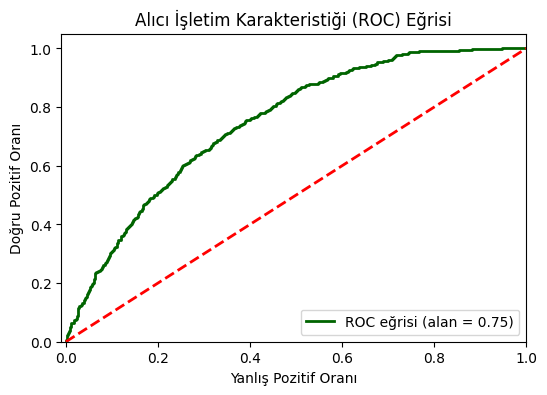

In [22]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_cv.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='ROC eğrisi (alan = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('Alıcı İşletim Karakteristiği (ROC) Eğrisi')
plt.legend(loc="lower right")
plt.show()


## Confusion Matrix

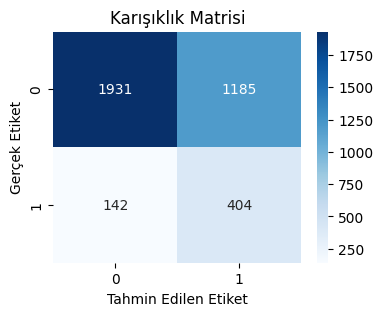

TP: 404, TN: 1931, FP: 1185, FN: 142


In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')

plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

# TP, TN, FP, FN değerlerinin belirlenmesi
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")


TP: 404 yani modelin doğru şekilde tahmin ettiği pozitif veri sayısıdır.

TN: 1931 modelin doğru şekilde tahmin ettiği negatif veri sayısıdır.

FP: 1184 modelin yalış şekilde pozitif olarak tahmin ettiği veri sayısıdır.

FN: 141 modelin yanlış şekilde negatif olarak tahmin ettiği veri sayısıdır.